# One-minute Review

Compute the following line integral. 
 $$\int_C \left(x^2-xy\right)\,dx + (y^2-x^2)\,dy$$ where $C$ is oriented curve below. 

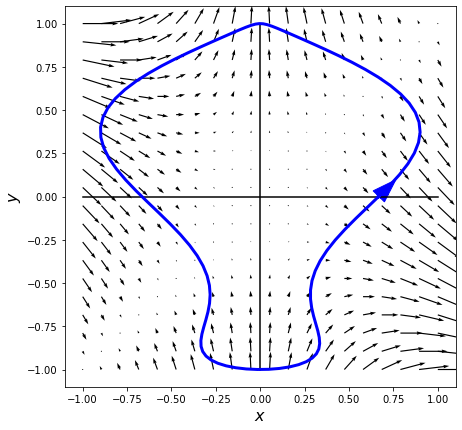

In [5]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x**2 - x*y,y**2 - x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(2/3,0,.001,.001,width=.03,color='b')
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
plt.plot((2/3+1/3*sin(6*pi*t))*cos(2*pi*t),sin(2*pi*t),'b',lw=3);

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d


plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace, array, arange,meshgrid

from scipy.integrate import quad,dblquad

def stripes(lev,a,b,c,d,steps=100):
    """Finds subitervals of [a,b] where
    c(x) <= lev <= d(x)
    for each x in the subinterval.
    
    Returns: list of tuples (x_i,y_i)"""
#     on = False 
    out = []
    tmp = []
    for i in np.linspace(a,b,steps):
        if c(i) <= lev <= d(i):
            xi = i
            if not tmp:
                tmp.append(xi)
        else:
            if tmp:
                out.append((tmp[0],xi))
                tmp = []
    if tmp:
        out.append((tmp[0],xi))
        tmp = []
    return out

## Example

Look at the vector field below. At the point $(.2,.2)$ (center of the red circle), is the curl positive, negative or 0?

How about the divergence?

In [3]:
@interact(zoom=(.2,1,.1),th=(0,pi/2,pi/10))
def _(zoom=1,th=pi/2,P=fixed(lambda x,y: -y - x),Q=fixed(lambda x,y: x - y)):
    plt.figure(figsize=(7,7))
    x = y = np.concatenate([arange(.2,.2+1.2*zoom,.05),arange(.2,.2-1.2*zoom,-.05)])
    x,y = meshgrid(x,y)
    plt.quiver(x,y,P(x,y),Q(x,y))
    plt.plot([0,0],[-2,2],'k')
    plt.plot([-2,2],[0,0],'k')
    t = linspace(0,2*pi,57)
    plt.plot(.1*cos(t)+.2,.1*sin(t)+.2,'r',lw=2)
    plt.quiver(.1*cos(t)+.2,.1*sin(t)+.2,.1*cos(t)*cos(th)-.1*sin(t)*sin(th),.1*sin(t)*cos(th)+.1*cos(t)*sin(th),color='r',alpha=(zoom < .4) and 1 or 0)
    for c in 'xy':
        getattr(plt,f"{c}lim")(.2-zoom,.2+zoom)
    

interactive(children=(FloatSlider(value=1.0, description='zoom', max=1.0, min=0.2), FloatSlider(value=1.570796…

The vector field above is $$\langle -y-x,x-y \rangle.$$ Compute these exactly.

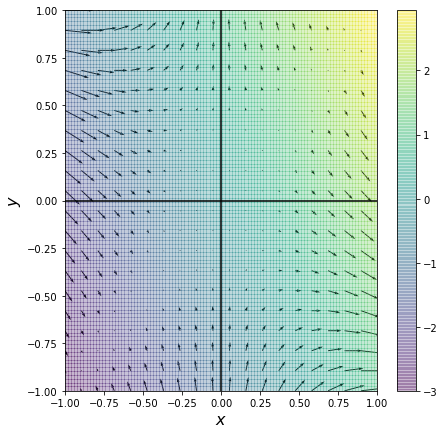

In [8]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x**2 - x*y,y**2 - x**2);
x = y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
plt.pcolormesh(x,y,2*x + y,alpha=.3)
plt.colorbar()
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
# plt.arrow(2/3,0,.001,.001,width=.03,color='b')
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
# plt.plot((2/3+1/3*sin(6*pi*t))*cos(2*pi*t),sin(2*pi*t),'b',lw=3);

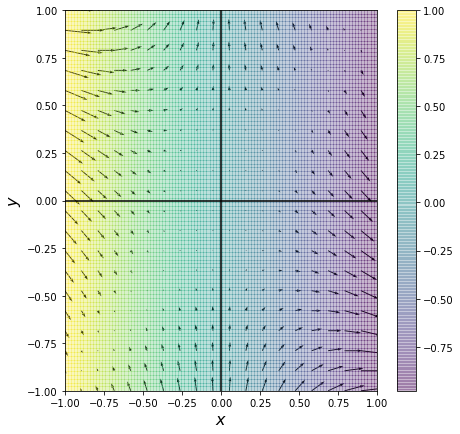

In [9]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x**2 - x*y,y**2 - x**2);
x = y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
plt.pcolormesh(x,y,-x ,alpha=.3)
plt.colorbar()
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
# plt.arrow(2/3,0,.001,.001,width=.03,color='b')
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
# plt.plot((2/3+1/3*sin(6*pi*t))*cos(2*pi*t),sin(2*pi*t),'b',lw=3);

## Exercise 

If $f$ and $\vec F$ are smooth scalar and vector fields, respectively, which of the following are meaningful?

  - $f(\nabla f)$
  - $\vec F \cdot \nabla f$
  - $\nabla\cdot \nabla f$
  - $\nabla \times \nabla \cdot \vec F$  
  - $\nabla \times \nabla f$
  - $\nabla \cdot \nabla \times \vec F $
  